# **Jacob Shearer - Final Project**

In [1]:
import random
import numpy as np
import scipy.fft as fft
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def test_signal(n_sample_points, sample_rate):
    sample_spacing = 1/sample_rate
    sampling_times = np.linspace(0.0, n_sample_points*sample_spacing, n_sample_points)
    A = 1
    analog_signal = lambda t:A*(np.sin(4*t) + np.sin(5*t) + np.sin(6*t))
    digital_signal = analog_signal(sampling_times)
    return sampling_times, digital_signal

In [3]:
def FT(sample_rate, signal):
    signal_ft = np.array([])
    N = len(signal)
    k_array = np.arange(0, N, 1)
    for k in k_array:
        ftsum = 0
        for n in range(N):
            ftsum += signal[n]*np.e**((-1j*2*np.pi*k*n)/N)
        
        signal_ft = np.append(signal_ft, ftsum)
        
    n = np.arange(N)
    T = N/sample_rate
    frequencies = n/T
    frequencies = np.append(frequencies[:int(len(frequencies)/2)],frequencies[int(len(frequencies)/2)-1::-1] * -1 )
    return frequencies, signal_ft

In [4]:
def IFT(signal_ft):
    ift = np.array([])
    N = len(signal_ft)
    n_array = np.arange(0, N, 1)
    for n in n_array:
        iftsum = 0
        for k in range(N):
            iftsum += signal_ft[k] * np.e**((1j*2*np.pi*k*n)/N)
        
        iftsum = iftsum/N
        ift = np.append(ift, iftsum)
    
    ift = np.real(ift)
    return ift

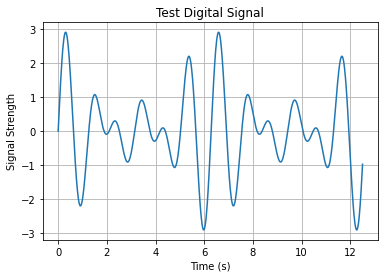

In [5]:
n_sample_points = 1000
sample_rate = 80
times, signal = test_signal(n_sample_points, sample_rate)
plt.plot(times, signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Test Digital Signal')
plt.grid()
plt.show()

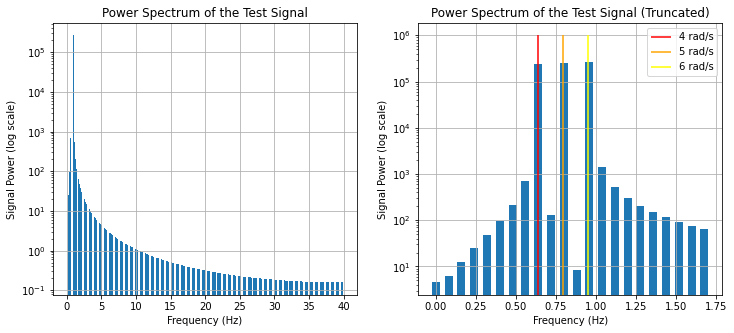

In [6]:
frequencies, signal_fft = FT(sample_rate, signal)
power_spectrum = np.abs(signal_fft)**2

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

# Cutting out the negative frequencies because, for the FT of real-valued functions, all of these negative frequencies 
# are mirror images of their positive counterparts.
ax1.bar(frequencies[:int(len(frequencies)/2)], power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_title('Power Spectrum of the Test Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/45)], power_spectrum[:int(len(frequencies)/45)], width=0.05)
ax2.vlines([4/(2*np.pi)], 0, 1e6, colors=('r'), label='4 rad/s')
ax2.vlines([5/(2*np.pi)], 0, 1e6, colors=('orange'), label='5 rad/s')
ax2.vlines([6/(2*np.pi)], 0, 1e6, colors=('yellow'), label='6 rad/s')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.legend()
ax2.set_title('Power Spectrum of the Test Signal (Truncated)')
ax2.grid()
plt.show()

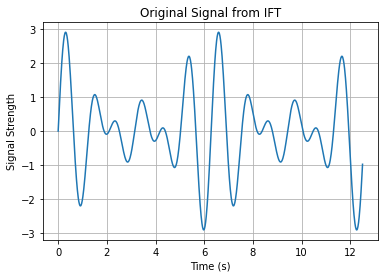

In [7]:
original_signal = IFT(signal_fft)
plt.plot(times, original_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Original Signal from IFT')
plt.grid()
plt.show()

In [8]:
def add_noise(signal, noise_amplitude, seed_n=None):
    if seed_n is not None:
        np.random.seed(seed_n)
    
    noise_function = lambda: noise_amplitude*np.random.normal(0, 1)
    noisy_signal = np.zeros(len(signal))
    for i in range(len(signal)):
        noisy_signal[i] = signal[i] + noise_function()
    
    return noisy_signal

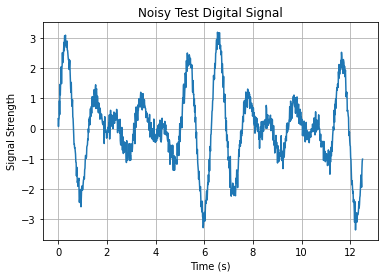

In [9]:
n_sample_points = 1000
sample_rate = 80
times, signal = test_signal(n_sample_points, sample_rate)
seed_n = 1
noise_amplitude = 0.2
noisy_signal = add_noise(signal, noise_amplitude, seed_n)
plt.plot(times, noisy_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Noisy Test Digital Signal')
plt.grid()
plt.show()

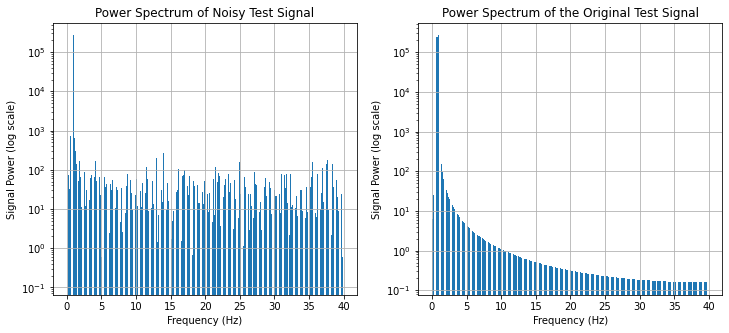

In [10]:
frequencies, noisy_signal_fft = FT(sample_rate, noisy_signal)
noisy_power_spectrum = np.abs(noisy_signal_fft)**2

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(frequencies[:int(len(frequencies)/2)], noisy_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_title('Power Spectrum of Noisy Test Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/2)], power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.set_title('Power Spectrum of the Original Test Signal')
ax2.grid()

plt.show()

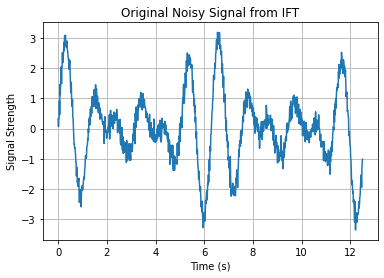

In [11]:
original_noisy_signal = IFT(noisy_signal_fft)
plt.plot(times, original_noisy_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.title('Original Noisy Signal from IFT')
plt.grid()
plt.show()

In [12]:
def autocorrelation(signal):
    length = len(signal)
    autocorrelation_array = []
    for tau in np.arange(0, length):
        correlation = np.sum(signal[:(length-tau)] * signal[tau:])
        autocorrelation_array.append(correlation)
    
    autocorrelation_array = np.array(autocorrelation_array)
    return autocorrelation_array[::-1]

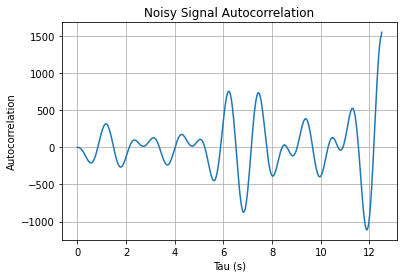

In [13]:
noisy_signal_autoc = autocorrelation(noisy_signal)
plt.plot(times, noisy_signal_autoc)
plt.xlabel('Tau (s)')
plt.ylabel('Autocorrelation')
plt.title('Noisy Signal Autocorrelation')
plt.grid()
plt.show()

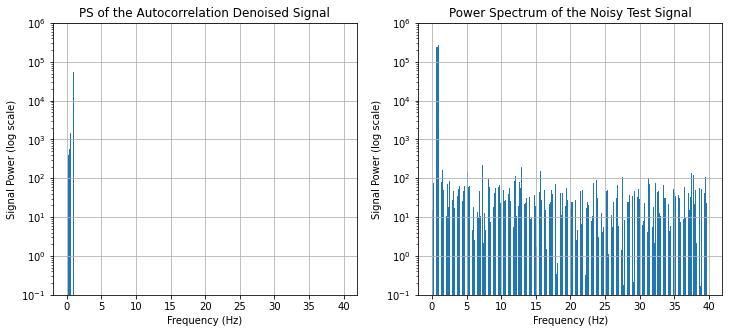

In [14]:
n_sample_points = 1000
sample_rate = 80
autoc_frequencies, autoc_ft = FT(sample_rate, noisy_signal_autoc)
autoc_power_spectrum = np.real(autoc_ft)/np.sqrt(2*np.pi)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12, 5))

ax1.bar(autoc_frequencies[:int(len(frequencies)/2)], autoc_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_ylim(1e-1, 1e6)
ax1.set_title('PS of the Autocorrelation Denoised Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/2)], noisy_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.set_ylim(1e-1, 1e6)
ax2.set_title('Power Spectrum of the Noisy Test Signal')
ax2.grid()

plt.show()

In [15]:
def windowed_sinc(times, cutoff_freq):
    m = len(times)
    filter_array = []
    for i in range(0, m):
        denom = i - m/2
        if denom == 0:
            h = 2*np.pi*cutoff_freq
        else:
            hamming_window = (0.54 - 0.46*np.cos(2*np.pi*(i/m)))
            h = (np.sin(2*np.pi*cutoff_freq*(i-m/2))/denom)*hamming_window
        
        filter_array.append(h)
    
    return filter_array/np.sum(filter_array)

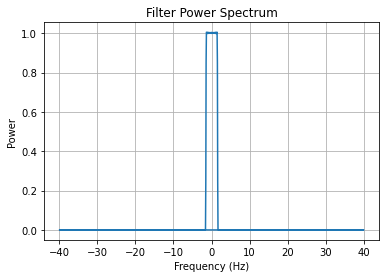

In [16]:
cutoff_freq = 1.6
n_sample_points = 1000
sample_rate = 80
filter_array = windowed_sinc(times, cutoff_freq/sample_rate)
frequencies, filter_ft = FT(sample_rate, filter_array)
frequencies, noisy_signal_ft = FT(sample_rate, noisy_signal)
convolution = filter_ft * noisy_signal_ft
convolution_power_spectrum = np.abs(convolution)**2

plt.plot(frequencies, np.abs(filter_ft)**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Filter Power Spectrum')
plt.grid()
plt.show()

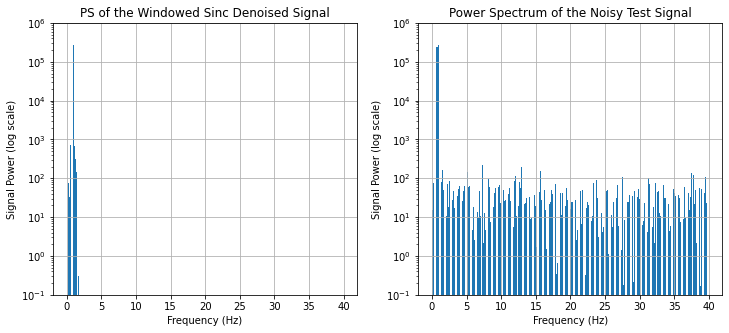

In [17]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12, 5))

ax1.bar(frequencies[:int(len(frequencies)/2)], convolution_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Signal Power (log scale)')
ax1.set_yscale('log')
ax1.set_ylim(1e-1, 1e6)
ax1.set_title('PS of the Windowed Sinc Denoised Signal')
ax1.grid()

ax2.bar(frequencies[:int(len(frequencies)/2)], noisy_power_spectrum[:int(len(frequencies)/2)], width=0.05)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Signal Power (log scale)')
ax2.set_yscale('log')
ax2.set_ylim(1e-1, 1e6)
ax2.set_title('Power Spectrum of the Noisy Test Signal')
ax2.grid()

plt.show()

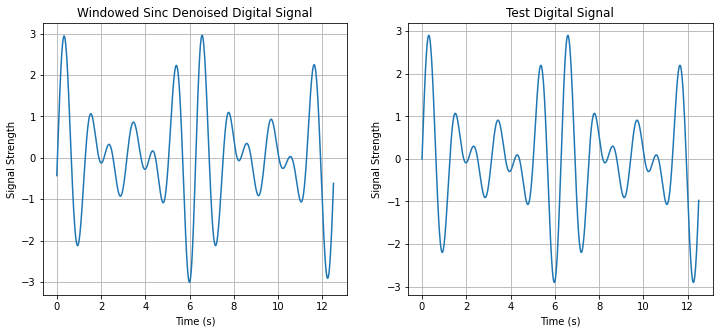

In [19]:
convolution_ift = IFT(convolution)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(times, convolution_ift)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Signal Strength')
ax1.set_title('Windowed Sinc Denoised Digital Signal')
ax1.grid()


ax2.plot(times, signal)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Signal Strength')
ax2.set_title('Test Digital Signal')
ax2.grid()

plt.show()